In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#PART 1: PREPROCESSING STATE
#importing table
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier #dt classifier
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_transdata.csv')

#Feature Extraction
x_data = data.iloc[:,0:7]
y_data = data.iloc[:, 7:]

print(f"Features shape: {x_data.shape}")
print(f"Label shape: {y_data.shape}")
y_data

Features shape: (1000000, 7)
Label shape: (1000000, 1)


,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
999995,0.0
999996,0.0
999997,0.0
999998,0.0


In [ ]:
#seperating test and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

print(f"Training features set: {x_train.shape}")
print(f"Training label set: {y_train.shape}")
print(f"Test features set: {x_test.shape}")
print(f"Test label set: {y_test.shape}")

Training features set: (800000, 7)
Training label set: (800000, 1)
Test features set: (200000, 7)
Test label set: (200000, 1)


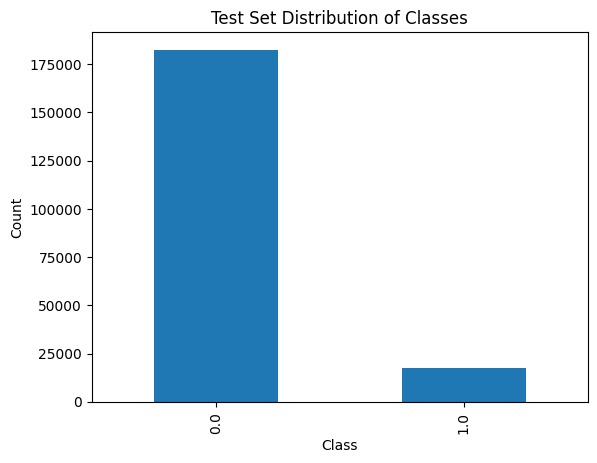

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = y_test

# Count the number of occurrences of each class
class_counts = df["fraud"].value_counts()

# Plot a bar chart to show the distribution of the classes
class_counts.plot(kind="bar")
plt.title("Test Set Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

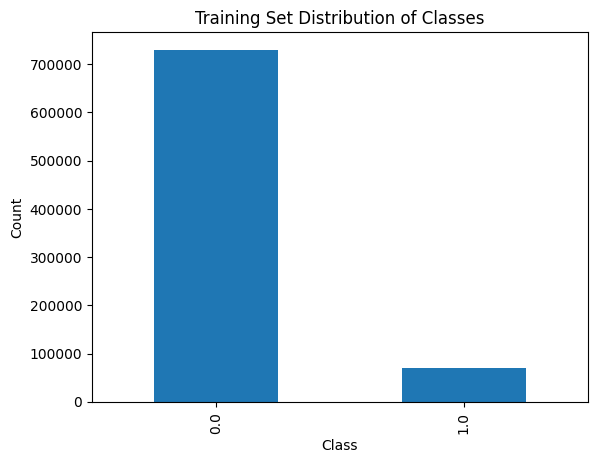

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = y_train

# Count the number of occurrences of each class
class_counts = df["fraud"].value_counts()

# Plot a bar chart to show the distribution of the classes
class_counts.plot(kind="bar")
plt.title("Training Set Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
#decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = "entropy") #change hyperparameters later for paper; 
tree_clf.fit(x_train, y_train)

NameError: ignored

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf, #our decision treee
    out_file = "credit_cards_dt.dot", #dot file that we will be trying to print
    feature_names = x_data.columns,
    rounded = True, #just means the boxes will have rounded corners
    filled = True #diff colors
)

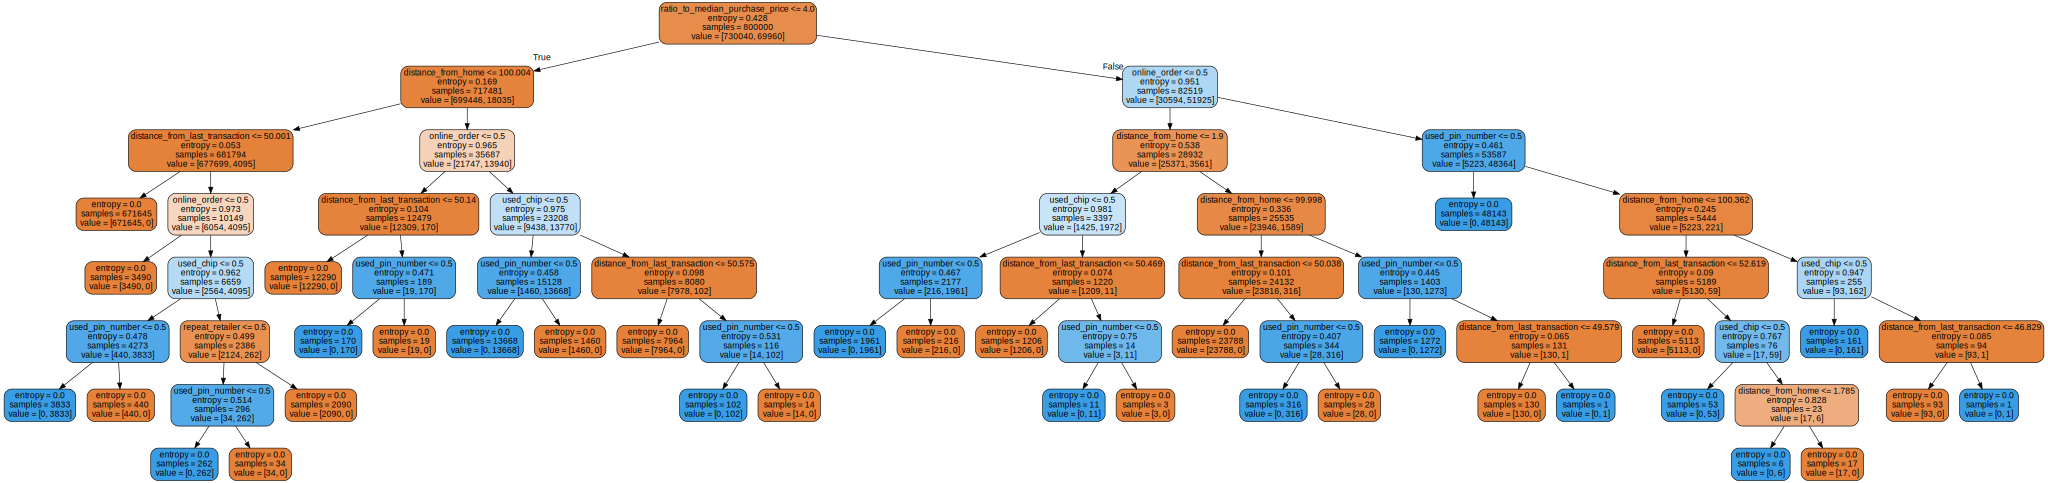

In [ ]:
from graphviz import Source #displays decision tree
source = Source.from_file("credit_cards_dt.dot")
source

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('credit_cards_dt.dot')
graph.write_png('credit_cards_dt.png')

In [ ]:
#Cross Validate predicion, for confusion matrix
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, x_data, y_data, cv = 3, scoring = "accuracy")  #hyperparameters part 2?
scores

array([0.999985 , 0.9999775, 0.9999925])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_cross_predict = cross_val_predict(tree_clf, x_data, y_data, cv = 3) #hyperparameters part 3?


In [ ]:
#Accuracy of the cross_val
from sklearn.metrics import *
precision = precision_score(y_train, y_cross_predict, average = "macro")
accuracy = accuracy_score(y_train, y_cross_predict)
recall = recall_score (y_train, y_cross_predict, pos_label = 1)
f1 = f1_score(y_train, y_cross_predict, pos_label = 1)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.999978855618342
Accuracy: 0.999985
Recall: 0.9998570611778159
F1: 0.9999142318028476


In [ ]:
#create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_cross_predict)
cm

array([[730038,      2],
       [    10,  69950]])

[True Positive, False Poisitive]

[False Negative, True Negative]

In [ ]:
#Predictions using the test set
y_test_pred = tree_clf.predict(x_test)

In [ ]:
#Accuracy of the prediction
from sklearn.metrics import *
precision = precision_score(y_test, y_test_pred, average = "macro")
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score (y_test, y_test_pred, pos_label = 1)
f1 = f1_score(y_test, y_test_pred, pos_label = 1)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.9999658558514717
Accuracy: 0.999985
Recall: 0.9998853408243995
F1: 0.9999140031532177


In [ ]:
#create the confusion matrix of the prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[182556,      1],
       [     2,  17441]])

<Axes: >

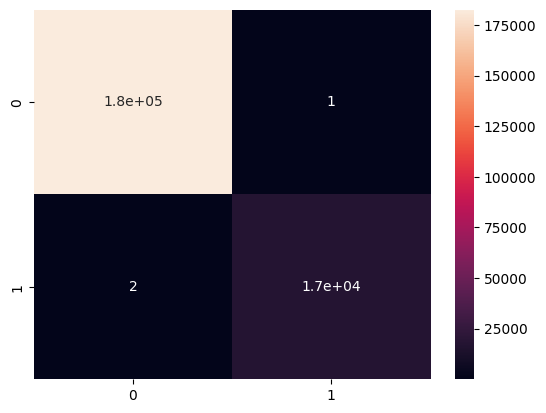

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)